# Advanced Numerical Analysis

## Exercise 45 - Fast Fourier Transform

$\textrm{(i)} \quad$ *Write a Matlab program for computing the FFT for vectors of dimensions* $N$ *not divisible by a prime greater than 31.*

The following implements the FFT as described in the lecture notes composed of a transformation step and a loop through the relevant prime numbers.

In [1]:
function zQ_prime = FFT_step(zQ, Q, T)
    N = length(zQ);
    zQ_prime = zeros(size(zQ));
    
    Q_prime = Q / T;
    P_prime = N / Q_prime;
    
    theta = 2 * pi / P_prime;
    omega = cos(theta) + 1i * sin(theta);
        
    for ell = Q_prime : -1 : 1
        x = 1;
        
        # indices for zQ and zQ_prime
        IQ = ell + N;
        IQ_prime = ell + Q;
        
        for k = P_prime : -1 : 1
        
            # effects reduction k mod P
            if IQ == ell
                IQ = ell + Q;
            endif
            
            x *= omega;
            IQ_prime -= Q_prime;
            
            # direct computation of zQ
            if T == 2
                IQ -= Q_prime;
                f = zQ(IQ);
                IQ -= Q_prime;
                zQ_prime(IQ_prime) = x * f + zQ(IQ);
            
            # Horner's scheme
            else
                f = 0;
                for j = T : -1 : 1
                    IQ -= Q_prime;
                    f = x * f + zQ(IQ);
                endfor
                zQ_prime(IQ_prime) = f;
            endif
        endfor
    endfor
endfunction

In [2]:
function z_hat = FFT(z)

    # initialization
    Q = length(z);
    zQ = z;
    
    # loop through prime factors
    primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31];
    for prime = primes
        
        # loop through multiplicity of prime factor
        while mod(Q, prime) == 0

            # find new coefficients
            z_hat = FFT_step(zQ, Q, prime);
            
            # update variables
            zQ = z_hat;
            Q = Q / prime;
        endwhile
    endfor
endfunction

In [4]:
N = 7;
z = 2 * rand(N, 1) - 1;
approx = FFT(z)
ref = fft(z)
max_error = max(abs(approx - ref))

approx =

  -0.553363 + 0.000000i
   2.445456 - 0.233796i
   0.010916 + 2.163515i
   0.950275 + 2.226800i
   0.950275 - 2.226800i
   0.010916 - 2.163515i
   2.445456 + 0.233796i

ref =

  -0.5534 +      0i
   2.4455 - 0.2338i
   0.0109 + 2.1635i
   0.9503 + 2.2268i
   0.9503 - 2.2268i
   0.0109 - 2.1635i
   2.4455 + 0.2338i

max_error = 2.5895e-15


In [6]:
N = 6;
z = 2 * rand(N, 1) - 1;
approx = FFT(z)

error: zQ_prime(0): subscripts must be either integers 1 to (2^63)-1 or logicals
error: called from
    FFT_step at line 42 column 36
    FFT at line 15 column 19


The algorithm as defined above works for prime dimensions but not yet for composite ones because of an index error that will be fixed in later revisions. Until then the standard FFT implementation is used for the rest of the exercise.

$$ $$
$\textrm{(ii)} \quad$ *For 10 random vectors* $x \in \mathbb{R}^N$ *for each* $N = p^k \le 100000$ *for* $p = 2, 3, 5, 7, 11$ *and* $k = 1 : 12,$ *compute the Fourier transform* $\hat{x}$ *and the inverse Fourier transform* $y$ *of* $\hat{x}.$ *Find the typical magnitude of the error* $\frac{||y - x||_2}{||x||_2}$ *in dependence on* $N.$

In [102]:
rand_num = 100;
primes = [2, 3, 5, 7, 11];
exponents = 1:12;

# tables to save the data in
table_N = [];
table_P = [];

# loop through given prime numbers
for prime = primes

    # lists to save max time and max error for each prime
    times_P = [];
    errors_P = [];
    
    # loop through given exponents
    for exponent = exponents
    
        # if N > 100 000 skip
        N = prime^exponent;
        if N > 1e5
            continue
        endif
        
        # list for time and error for each random vector
        times_N = [];
        errors_N = [];
        rel_errors_N = [];
        
        # random vector with entires uniformly sampled in [-1, 1]
        for _ = 1 : rand_num
            x = 2 * rand(N, 1) - 1;
            
            # calculate DFT and measure computation time
            tic();
            x_hat = fft(x);
            times_N = [times_N, toc()];
            
            # calculate inverse and measure the relative error
            y = ifft(x_hat);
            errors_N = [errors_N, norm(y - x)];
            rel_errors_N = [rel_errors_N, norm(y - x) / norm(x)];
        endfor
        
        # append data to lists and tables
        times_P = [times_P, times_N];
        errors_P = [errors_P, errors_N];
        table_N = [table_N; [N, mean(times_N), mean(errors_N), mean(rel_errors_N)]];
    endfor
    table_P = [table_P; [prime, max(times_P), max(errors_P)]];
endfor

# sort table in N
table_N = sortrows(table_N, 1);

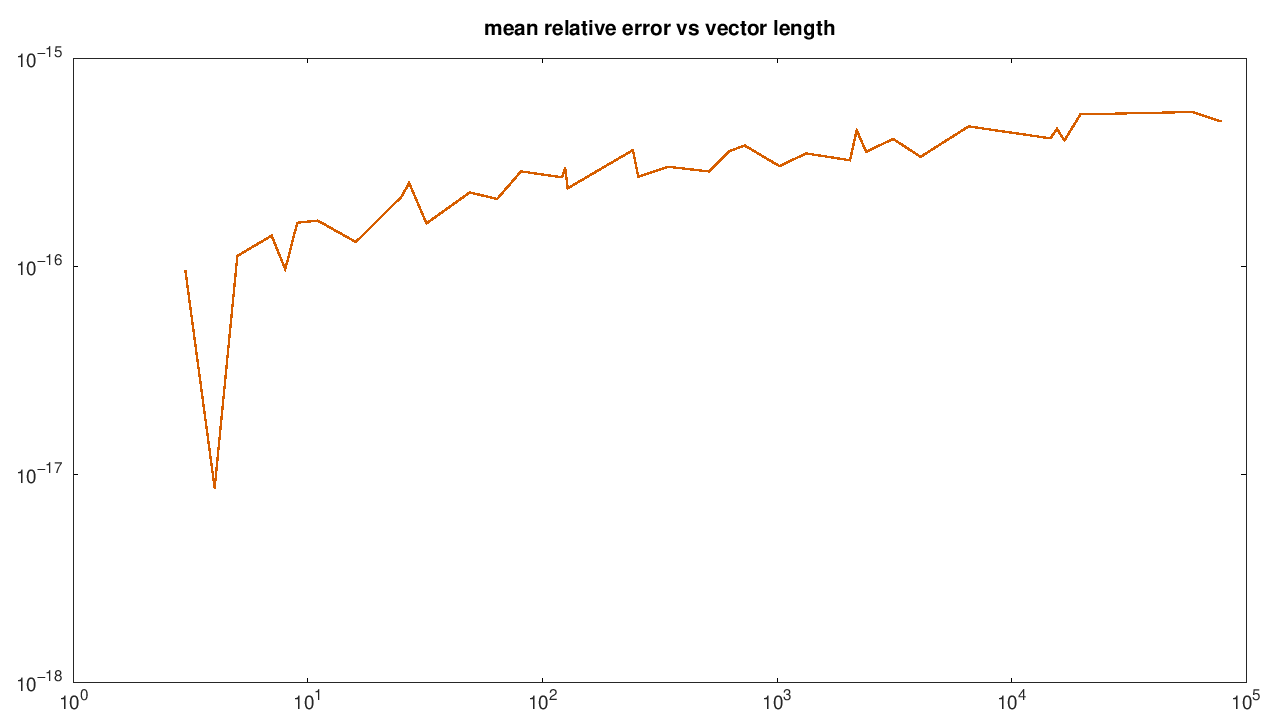

In [104]:
%plot -s 1280,720
blue = [0, 114, 178] / 255;
orange = [213, 94, 0] / 255;

loglog(table_N(2:end, 1), table_N(2:end, 4), "color", orange, "linewidth", 5);
title("mean relative error vs vector length");

$$ $$
$\textrm{(iii)} \quad$ *Compare speed and accuracy in dependence on* $N$ *and* $p.$

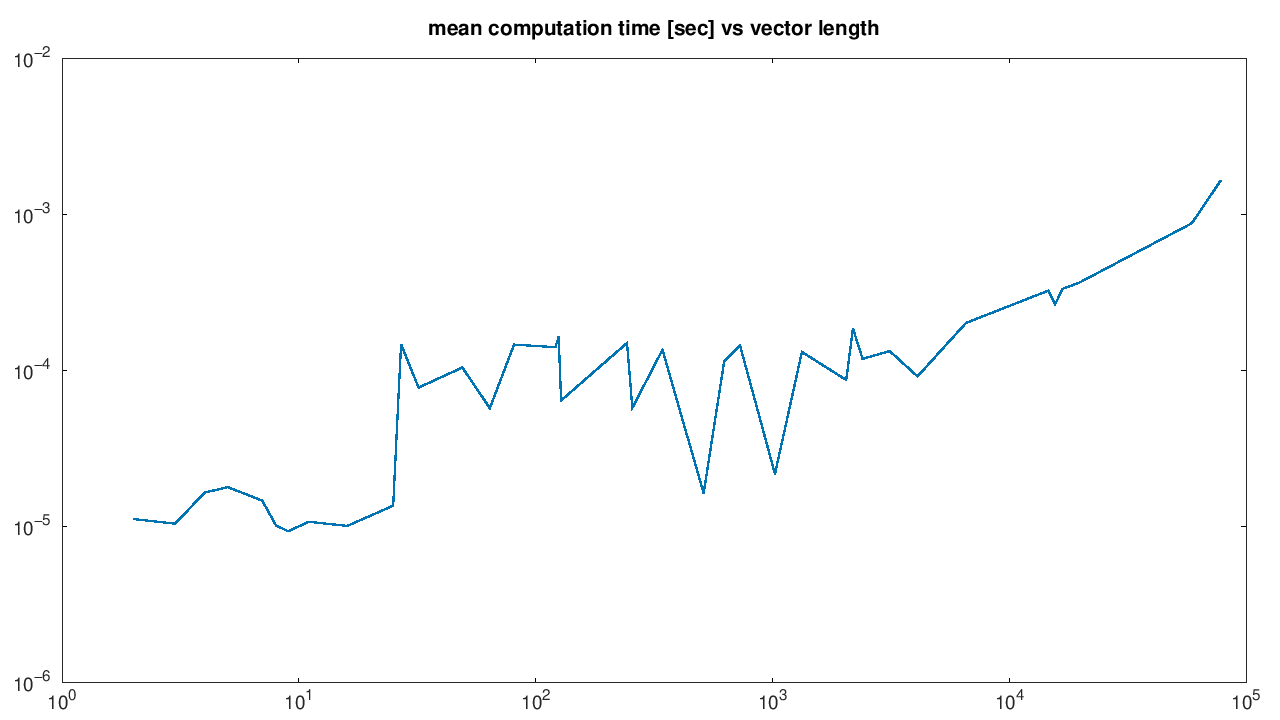

In [105]:
loglog(table_N(:, 1), table_N(:, 2), "color", blue, "linewidth", 5);
title("mean computation time [sec] vs vector length");

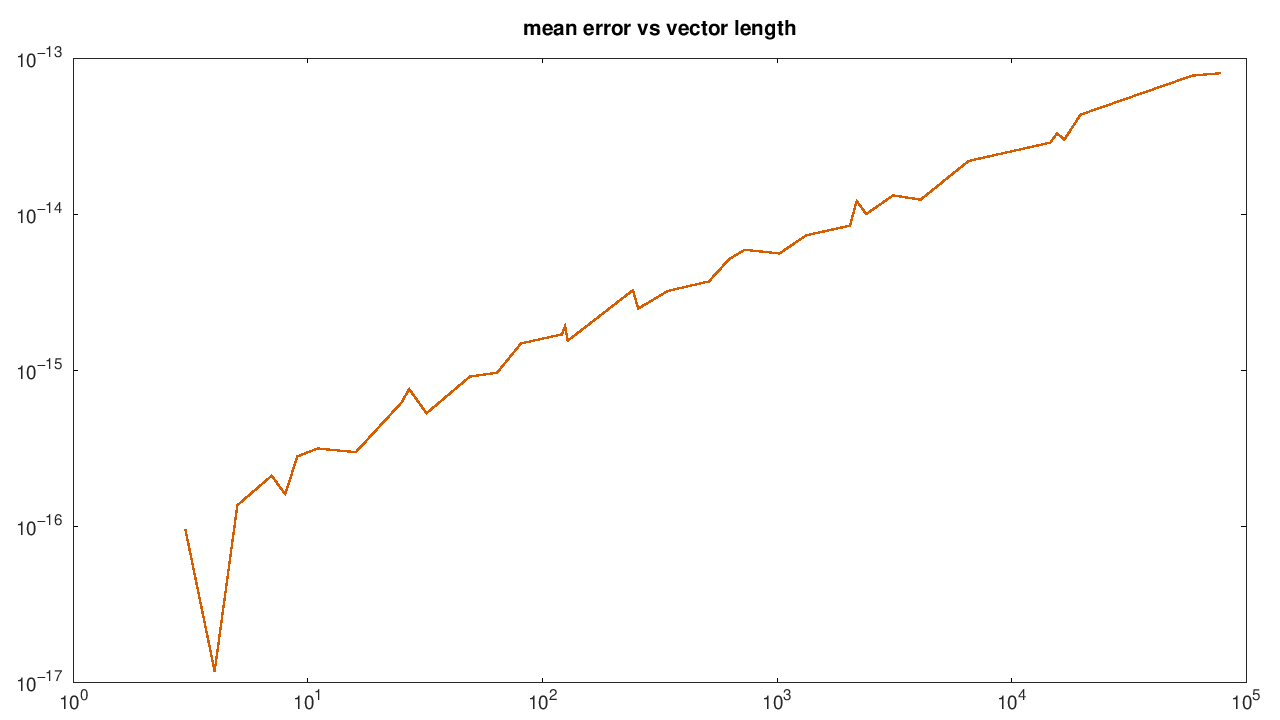

In [108]:
loglog(table_N(2:end, 1), table_N(2:end, 3), "color", orange, "linewidth", 5);
title("mean error vs vector length");

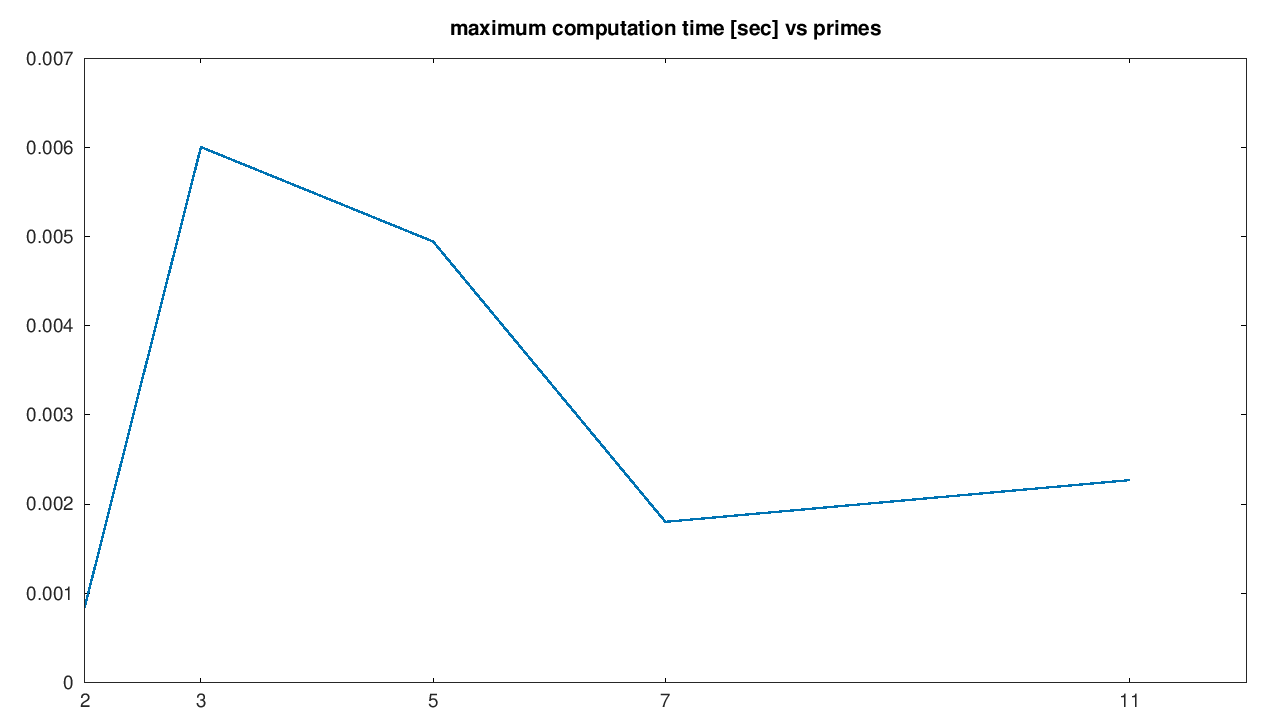

In [109]:
plot(table_P(:, 1), table_P(:, 2), "color", blue, "linewidth", 5);
title("maximum computation time [sec] vs primes");
set(gca, "xtick", primes)

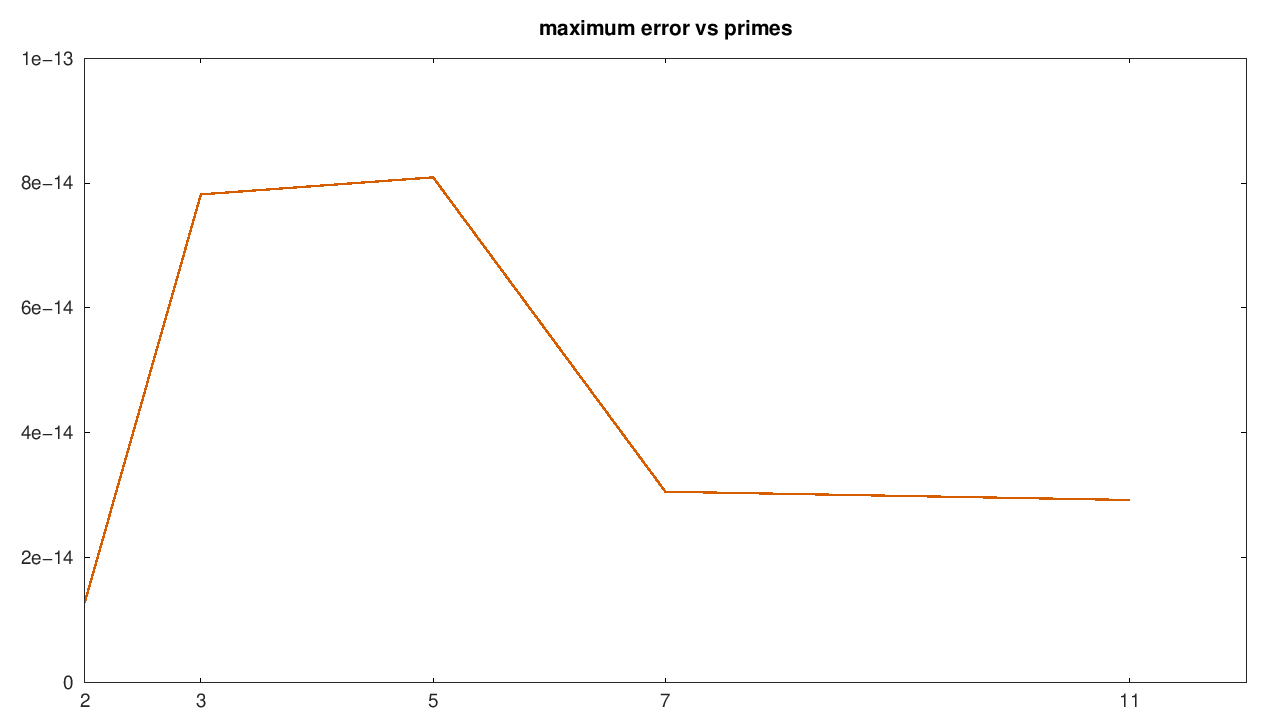

In [111]:
plot(table_P(:, 1), table_P(:, 3), "color", orange, "linewidth", 5);
title("maximum error vs primes");
set(gca, "xtick", primes)

$$ $$
$\textrm{(iv)} \quad$ *For* $N = 2n + 2 \in \{6, 12\},$ *find the discrete Fourier coefficients* $c^{(N)}_j,\ j = -n, \dots, n$ *for the function* $f(x)$ *with period* $T = 2$ *given by* $f(x) := x^3 - 3x|x|+ 2x$ *for* $x \in [-1, 1].$ *For the corresponding trigonometric polynomial* $\phi_N(x) = \sum_{j=-n}^n c^{(N)}_j \exp\big(-\frac{2 \pi}{T} i j x \big)$ *of degree* $\le n$ *that optimally approximates* $f(x)$ *at the grid points, determine the maximal deviation* $\max_k \big|f(x_k) - \phi_N(x_k)\big|,$ *where* $x_k = \frac{k \pi}{32}$ *for* $k = 0, \dots, 32$

degree | max error
     6 | 9.621e+00
    12 | 1.237e+01


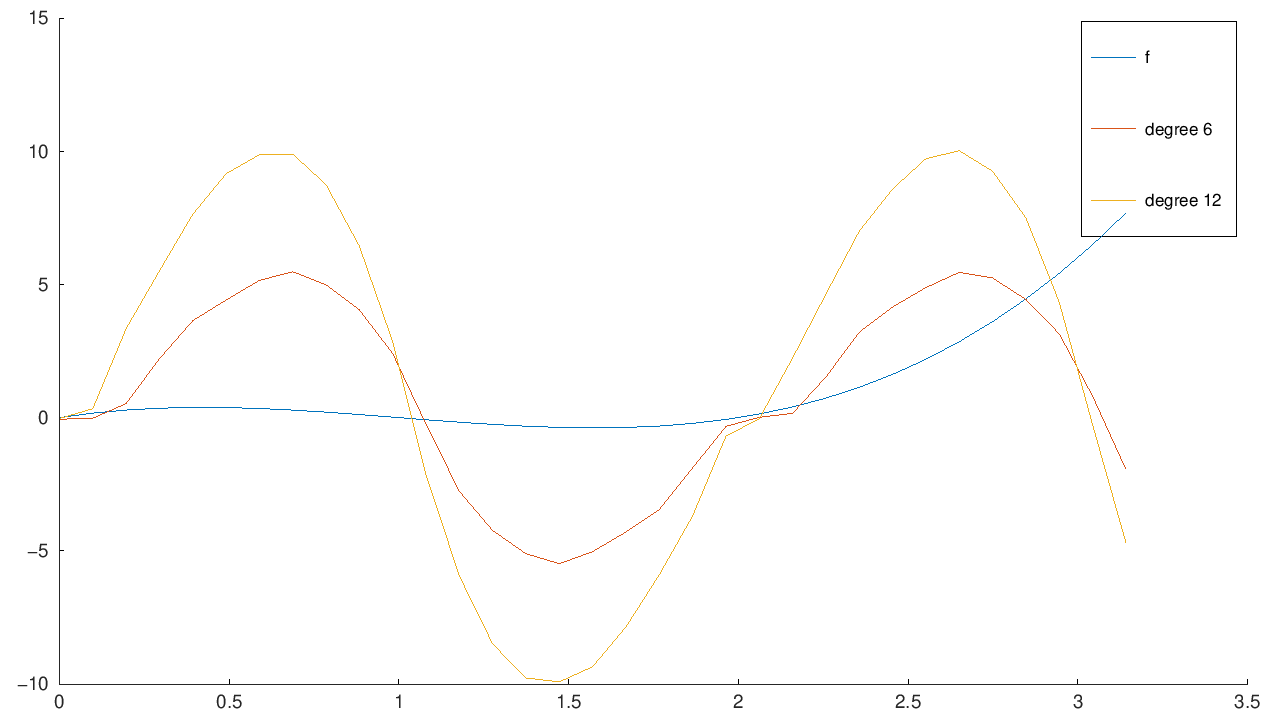

In [101]:
degrees = [6, 12];
period = 2;
points = pi * [0:32] / 32;

function y = f(x)
    y = x.^3 .- 3 .* x .* abs(x) .+ 2 .* x;
endfunction

# f evaluated on the given grid
f_vals = f(points);

hold on;
plot(points, f_vals, "displayname", "f");

disp("degree | max error")

for n = degrees
    N = 2 * n + 2;
    
    # sample f
    f_samples = f(linspace(-1, 1, N)); #f(pi * [0 : 2*n] / (2*n+1))
    
    # determine discrete Fourier coefficients
    C = fft(f_samples);
    
    # reorder the coefficients to j = -n, ..., n
    C = [C(n+2:end), C(1:n+1)];
    
    # calculate trigonometric polynomial approximation on comparison grid 
    phi_vals = [];
    for x = comparison_points
        phi_x = 0;
        for j = -n : n
            phi_x += C(j+n+2) * exp(-2i * pi * j * x / period);
        endfor
        phi_vals = [phi_vals, phi_x];
    endfor
    
    plot(comparison_points, phi_vals, "displayname", sprintf("degree %d", n));
    
    # calculate maximum error on comparison grid
    max_error = max(abs(f_vals - phi_vals));
    printf("%6d | %.3e\n", n, max_error);
endfor

legend();

Since the trigonometric polynomial just extends the sinusoidial part from $[-1, 1]$ of $f$ the interpolation is quite off from the actual cubic polynomial on $[0, \pi].$